#### **Importing the Library**

In [450]:
# The basic library for data analysis and visulaization
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [451]:
# Sklearn library for recommender system
from sklearn.model_selection import train_test_split 
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

####**Loading the Feature Data**
1. Top Level Feature Matrix
2. Topic Level Feature Matrix
3. Text Level Feature Matrix

#####**1. Top Level Feature Data**

In [452]:
# Importing the feature data from the initial top level feature engineering
df_level_top = pd.read_pickle("/content/drive/MyDrive/BrainStation/df_tweet_train.pkl")
df_level_1= df_level_top.copy()
df_level_1.reset_index(inplace=True)
df_level_1.drop(["text_document","lemmatized_texts","index"],axis=1,inplace=True)
df_level_1.head(10)

,user_name,avg_word_count_per_week,total_tw_morning,total_twt_afternoon,total_twt_evening,total_twt_night,avg_emoji_wordcount_ratio,avg_usertag_wordcount_ratio,avg_hashtag_wordcount_ratio,twt_profanity_score,twt_polarity_score,emoji_polarity_score
0,pretagil,14.000000,0,0,1,0,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000
1,mirzasania,17.564706,46,37,10,15,0.148067,0.070451,0.080767,0.008658,0.231919,-0.031254
2,parishilton,52.633333,28,12,26,46,0.222708,0.298165,0.077463,0.005450,0.312687,-0.030072
3,piersmorgan,66.821429,20,44,43,3,0.064941,0.058175,0.014338,0.006810,0.159579,-0.004014
4,timtebow,24.500000,3,50,40,24,0.008909,0.092427,0.063165,0.036580,0.255472,0.000000
5,johnbishop100,24.446154,25,26,29,9,0.065442,0.154875,0.010982,0.002665,0.321815,-0.002160
6,serenawilliams,16.696629,6,40,44,32,0.015569,0.097657,0.093458,0.000000,0.265254,-0.005365
7,maroon5,14.672414,3,18,43,19,0.059387,0.269324,0.173219,0.000000,0.276295,-0.001505
8,mikasingh,25.277778,39,22,8,4,0.033687,0.138702,0.072229,0.012374,0.294858,-0.002137
9,robertsemma,17.169231,2,15,35,48,0.054386,0.134093,0.110222,0.007866,0.240917,-0.009559


#####**2. Topic Level Feature Data**

In [453]:
# Importing the feature data from the topic level data analysis
df_level_topic = pd.read_pickle("/content/drive/MyDrive/BrainStation/topic_level_feature_matrix.pkl")
df_level_2 = df_level_topic.copy()
df_level_2.reset_index(inplace=True)
df_level_2.rename(columns={"index":"user_name"},inplace=True)
df_level_2.head()

,user_name,topic_1,topic_2,topic_3,topic_4,topic_5
0,pretagil,-0.291492,-0.092447,-0.125933,0.093437,-0.161381
1,mirzasania,-0.033165,0.043515,0.136132,0.005216,-0.103421
2,parishilton,0.113673,0.049506,0.016216,0.122499,-0.010074
3,piersmorgan,-0.007345,0.150776,0.195376,-0.044401,-0.082137
4,timtebow,0.023662,0.148851,0.095937,0.000779,-0.011743


#####**3. Text Level Feature Data**

In [454]:
# Importing the feature data from the texting level data analysis
df_level_text = pd.read_pickle("/content/drive/MyDrive/BrainStation/text_level_feature_matrix.pkl")
df_level_3 = df_level_text.copy()
df_level_3.reset_index(inplace=True)
df_level_3.rename(columns={"index":"user_name"},inplace=True)
df_level_3.head()

,user_name,0,1,2,3,4,5,6,7,8,...,147590,147591,147592,147593,147594,147595,147596,147597,147598,147599
0,pretagil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,mirzasania,0.131436,0.007573,0.293627,-0.151418,-0.039667,0.007688,-0.168641,-0.126157,0.053723,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,parishilton,0.037284,0.266236,-0.177273,-0.000795,-0.228873,0.125547,-0.069322,0.161116,-0.077844,...,-0.027703,0.057849,-0.009585,-0.024870,-0.097929,0.139356,0.052240,-0.000128,-0.058629,-0.057176
3,piersmorgan,0.062196,-0.006097,-0.007706,0.011647,0.155652,-0.059457,-0.026771,-0.084850,0.057227,...,-0.161023,0.131608,-0.008456,-0.367710,-0.078529,-0.162835,-0.052445,0.134085,-0.202317,-0.083041
4,timtebow,-0.057838,-0.100959,-0.073216,0.059703,0.194651,0.090772,0.031257,0.055684,-0.012021,...,0.251591,-0.031324,-0.093769,-0.154632,0.193099,0.061407,-0.074184,0.006405,-0.037542,0.016034


In [455]:
df_level_3.shape

(611, 147601)

###**Recommender System - Modelling**

In [456]:
#  Asssigning the User_name for all the three model
user_name= "billgates"

In [457]:
# Creating a empty dataframe to store the recommandation results for each category of features
recommandation_result_df= pd.DataFrame()

##### **Recommender System - Top Level Feature Matrix**

In [458]:
def content_recommender(screen_name, df, similarities) :
    # Get the movie by the title
    user_index = df[df["user_name"] == screen_name].index
    
    # Create a dataframe with the movie titles
    sim_df = pd.DataFrame(
        {'user_name': df["user_name"], 
         'similarity': np.array(similarities[user_index, :]).squeeze(),
        })
    
    # Get the top 10 closet user 
    top_user = sim_df.sort_values(by='similarity',ascending=False).head(6) 
    return top_user

In [459]:
# droping the user_name column
level_matrix_1 = df_level_1.drop("user_name",axis=1)

# Scaling the training data
scaler = StandardScaler()
scaled_level_matrix_1 = scaler.fit_transform(level_matrix_1)

# Creating the Similarity matrix with for the top level features
similarities_level_I = cosine_similarity(scaled_level_matrix_1, dense_output=False)
similarities_level_I.shape

(815, 815)

In [460]:
# Test the recommender for top level features
similar_user_I = content_recommender(user_name, df_level_1, similarities_level_I)

# Adding the result for top level features
recommandation_result_df["top_level_features"] = similar_user_I["user_name"].values

similar_user_I.head()

,user_name,similarity
95,billgates,1.000000
357,johncena,0.953835
572,wyclef,0.952182
139,schwarzenegger,0.944681
360,mcilroyrory,0.938515


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


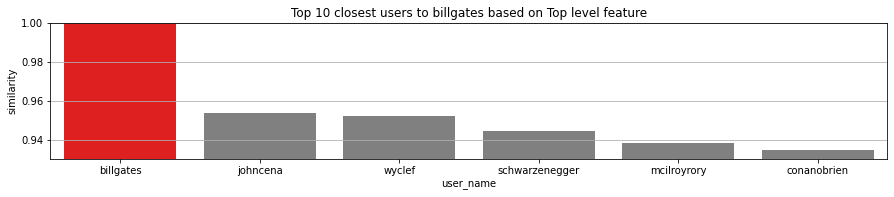

In [461]:
# Visualizing the Top recommanded user based upon the top level feature matrix
mean = similar_user_I["similarity"].mean()
std = similar_user_I["similarity"].std()
plt.figure(figsize=(15,2.5))
clrs = ['grey' if (x != user_name) else 'red' for x in similar_user_I["user_name"] ]
sns.barplot(similar_user_I["user_name"],similar_user_I["similarity"],palette=clrs)
plt.ylim(mean-std,1)
plt.grid(axis='y')
plt.title(f"Top 10 closest users to {user_name} based on Top level feature")
plt.show()

In [462]:
# Analyse the user with all the top level features
names =similar_user_I["user_name"].to_list()
names.append(user_name)
similar_user_df = df_level_1[df_level_1["user_name"].isin(names)]
similar_user_df["similarities_score"]=similar_user_I.loc[:,"similarity"].copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


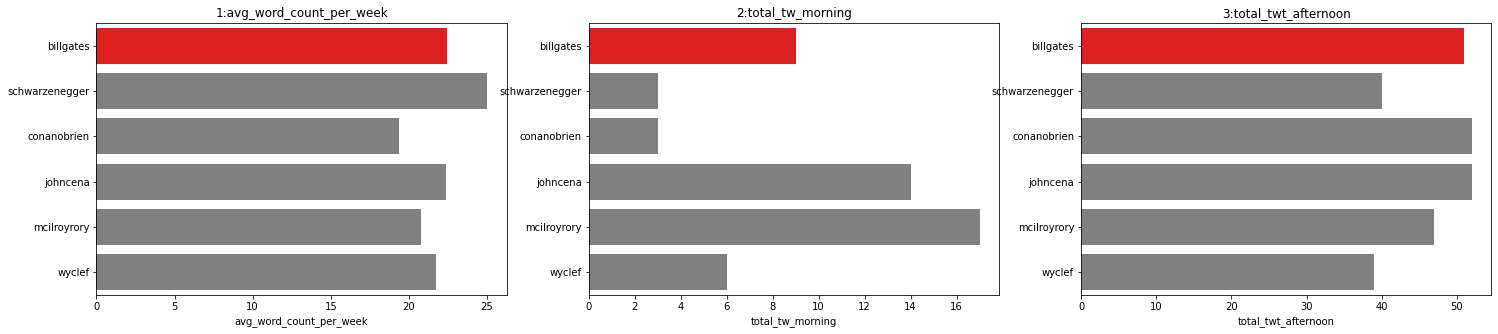

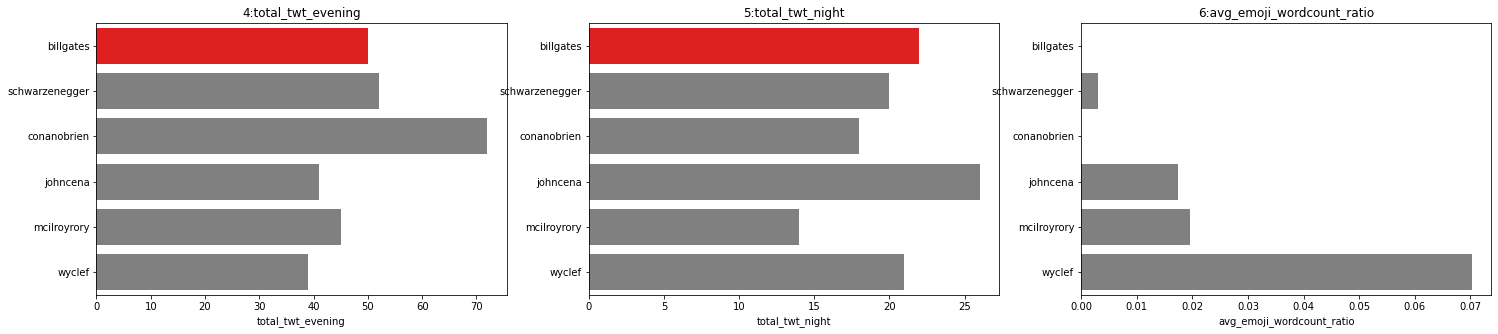

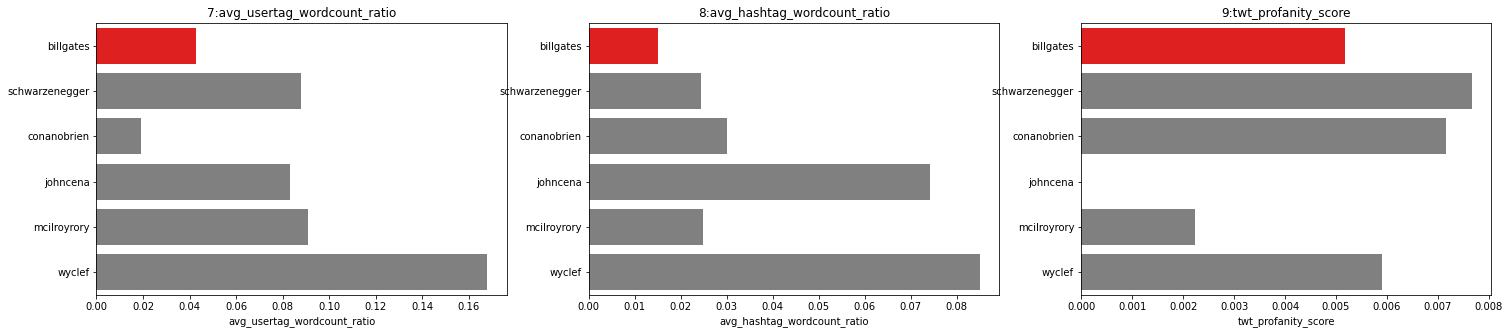

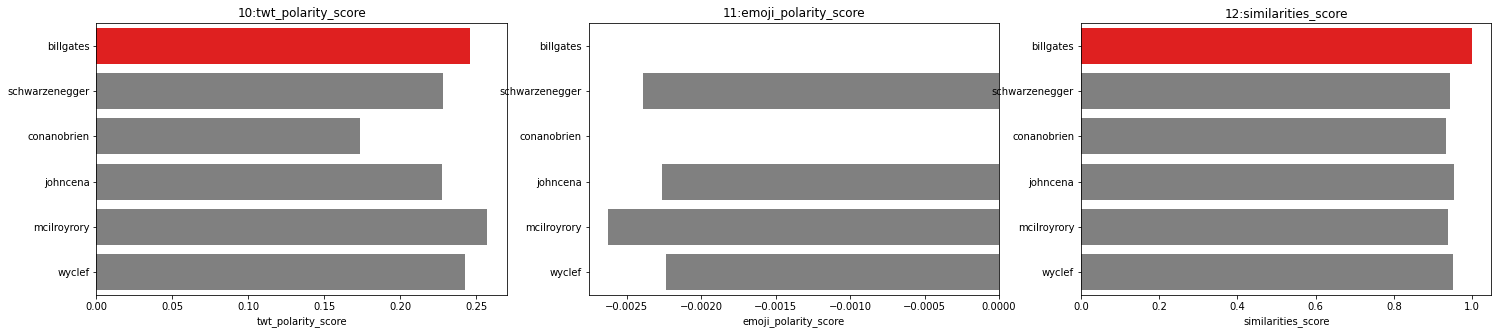

In [463]:
# Visualisation of all the top level feature of recommanded user with repsect to the main user 
for index in range(1,13,3):
  plt.figure(figsize=(25,5))
  feature_name = similar_user_df.columns[index]
  plt.subplot(1,3,1)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  plt.ylabel("")
  plt.title(f"{index}:{feature_name}")

  feature_name = similar_user_df.columns[index+1]
  plt.subplot(1,3,2)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  plt.ylabel("")
  plt.title(f"{index+1}:{feature_name}")

  feature_name = similar_user_df.columns[index+2]
  plt.subplot(1,3,3)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  plt.ylabel("")
  plt.title(f"{index+2}:{feature_name}")

  plt.show()

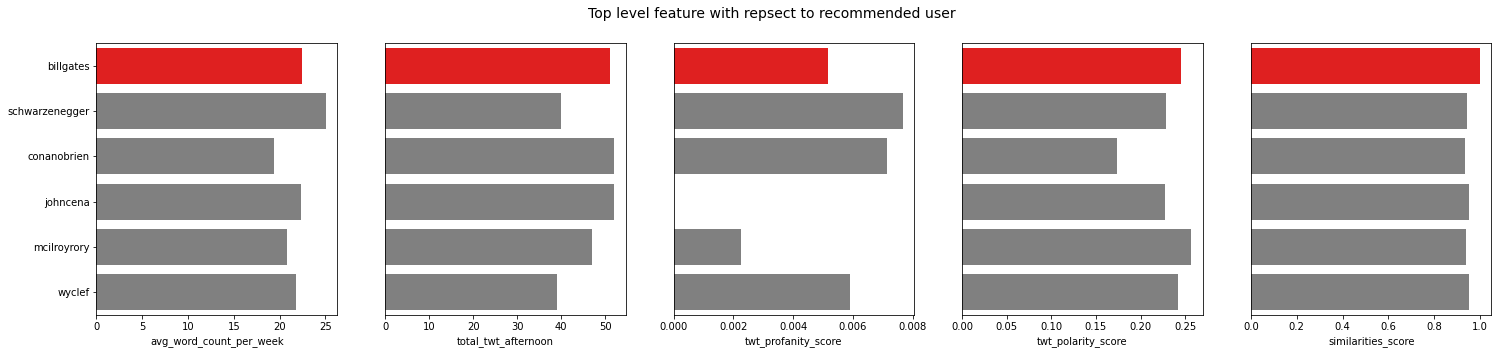

In [464]:
mylist=[1,3,9,10,12]
plt.figure(figsize=(25,5))
for index, value in enumerate(mylist):
  feature_name = similar_user_df.columns[value]
  plt.subplot(1,len(mylist),index+1)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  if index !=0:
      plt.yticks([])
  plt.ylabel("")
 
plt.suptitle(f"Top level feature with repsect to recommended user",fontsize =14)
plt.show()

Based on the top level feature,the proximity of users with respect to the overall similarity score is not the reflection of how they are aligned with respect to the individual features.However features like average tweet count per week , subjectivity score and polarity score  strongly flow the overall similarity trend. 

###### **Evaluating the Top level recommander Sytem Model**

In [465]:
# Reducing the dimension of the Top_level_feature matrix
df_level_1_pca = df_level_1.copy()
df_level_1_pca.drop(["user_name"],axis=1,inplace=True)
df_level_1_pca.head(10)


,avg_word_count_per_week,total_tw_morning,total_twt_afternoon,total_twt_evening,total_twt_night,avg_emoji_wordcount_ratio,avg_usertag_wordcount_ratio,avg_hashtag_wordcount_ratio,twt_profanity_score,twt_polarity_score,emoji_polarity_score
0,14.000000,0,0,1,0,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000
1,17.564706,46,37,10,15,0.148067,0.070451,0.080767,0.008658,0.231919,-0.031254
2,52.633333,28,12,26,46,0.222708,0.298165,0.077463,0.005450,0.312687,-0.030072
3,66.821429,20,44,43,3,0.064941,0.058175,0.014338,0.006810,0.159579,-0.004014
4,24.500000,3,50,40,24,0.008909,0.092427,0.063165,0.036580,0.255472,0.000000
5,24.446154,25,26,29,9,0.065442,0.154875,0.010982,0.002665,0.321815,-0.002160
6,16.696629,6,40,44,32,0.015569,0.097657,0.093458,0.000000,0.265254,-0.005365
7,14.672414,3,18,43,19,0.059387,0.269324,0.173219,0.000000,0.276295,-0.001505
8,25.277778,39,22,8,4,0.033687,0.138702,0.072229,0.012374,0.294858,-0.002137
9,17.169231,2,15,35,48,0.054386,0.134093,0.110222,0.007866,0.240917,-0.009559


In [466]:
# reducing the dimensions of the features
pca_top = PCA(n_components=2).fit_transform(df_level_1_pca)
top_level_pca = pd.DataFrame(pca_top)
top_level_pca.columns =["pc_1","pc_2"]
top_level_pca.index =df_level_1["user_name"]
top_level_pca.head()

,pc_1,pc_2
user_name,,
pretagil,-32.258742,-2.527230
mirzasania,5.032194,35.165745
parishilton,26.586537,8.925001
piersmorgan,38.886070,31.757596
timtebow,32.118700,0.960090


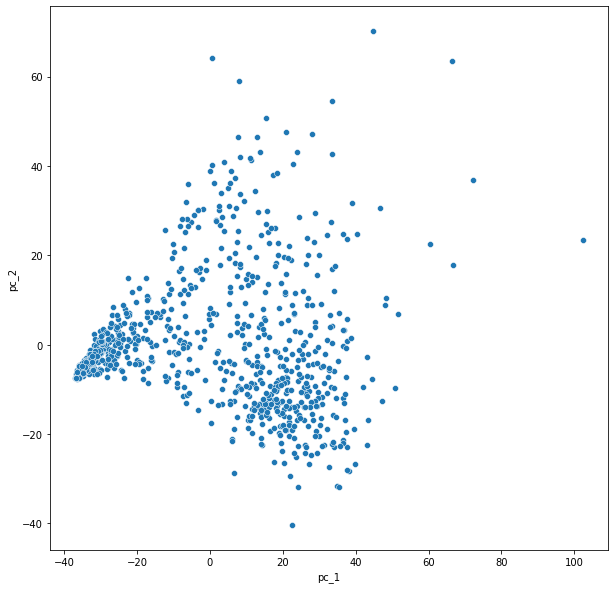

In [467]:
# Visualizing the distribution of the Top level feature in lower dimensions
plt.figure(figsize=(10,10))
sns.scatterplot(data =top_level_pca, x ="pc_1", y ="pc_2")
plt.show()

The above scatter plot indicates that the top level feature is not  distributed in a weirdly shaped, such as our concentric circles,therefore K-mean clustering algorithim is considered 

In [468]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_top = ss.fit_transform(df_level_1_pca)

In [469]:
# Look over a range of K values
k_range = np.arange(2,20)

# Instantiate an empty list of inertias
inertia_list = []
silhouette_scores=[]

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit and predict
    k_means_model.fit(X_top)
    cluster_labels = k_means_model.predict(X_top)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)

    
    # Get silhouette_scores and add to list 
    silhouette_scores.append(silhouette_score(X_top, cluster_labels))
    

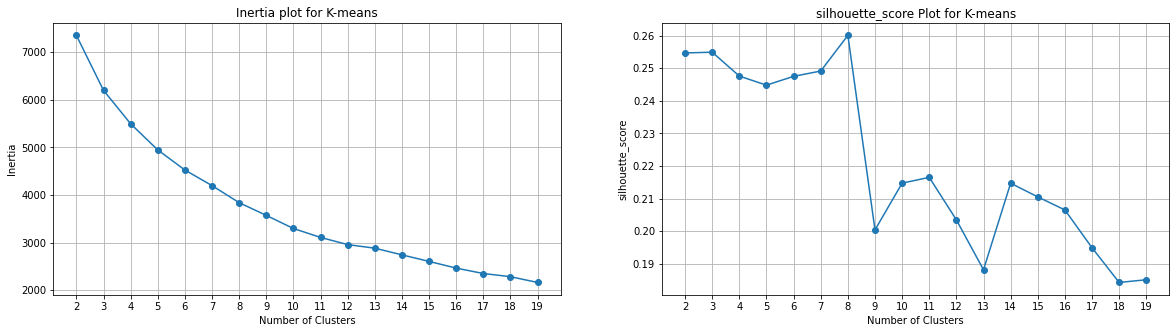

In [470]:
plt.figure(figsize=(20,5))

# Visualize the Interia of the model
plt.subplot(1,2,1)
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia plot for K-means')
plt.xticks(k_range)
plt.grid()


# Visualize the silhouette_score of the model
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Plot for K-means')
plt.grid()
plt.xticks(k_range)

plt.show();

Though it is not clear from the inertia score, but with respect to the silhouette score it is clear that the twelve clusters optimize both the inertia and the silhouette score for the mode.Therefore the dataset was grouped into 12 clusters and the proximity of the recommander system results are checked with respect to the cluster they belongs.

In [471]:
# Optimal K mean model 
kmeans_model = KMeans(n_clusters = k_range[np.argmax(silhouette_scores)]).fit(X_top)
k_means_labels = kmeans_model.predict(X_top)
print(set(k_means_labels))
list(k_means_labels).count(8)

{0, 1, 2, 3, 4, 5, 6, 7}


0

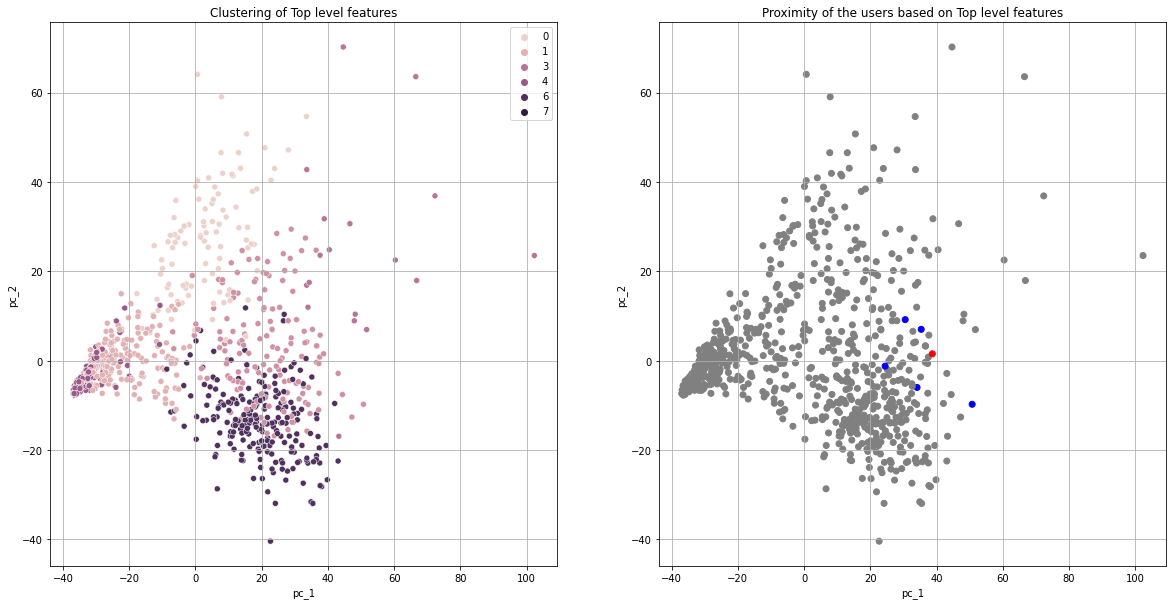

In [472]:
# Ploting the top level feature in lower dimension with respect to its cluster.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data =top_level_pca, x ="pc_1", y ="pc_2",hue =k_means_labels)
plt.grid()
plt.title("Clustering of Top level features")

# ploting the results of the recommander system over the clusters
feature_name = similar_user_df.columns[index]
clrs=[]
for name  in top_level_pca.index:
  if name in similar_user_df["user_name"].values and name != user_name:
    clrs.append("blue")
  elif name in similar_user_df["user_name"].values and name == user_name:
    clrs.append("red")
  else:
    clrs.append("grey")

plt.subplot(1,2,2)
plt.scatter(data =top_level_pca, x ="pc_1", y ="pc_2",c=clrs)
plt.grid()
plt.title("Proximity of the users based on Top level features")
plt.xlabel("pc_1")
plt.ylabel("pc_2")
plt.show()

Comparing the above two scatter plots ,it is clear that the recommender system model for the top level feature respects the clustering algorithm.i.e it model recommends the users from the same cluster.


##### **Recommender System - Topic Level Feature Matrix**

In [473]:
# Dropping the user_name from the topic level features
level_matrix_2 = df_level_2.drop("user_name",axis=1)

# Scaling the training data
scaler = StandardScaler()
scaled_level_matrix_2 = scaler.fit_transform(level_matrix_2)

# Creating the Similarity matrix with for the topic level features
similarities_level_II = cosine_similarity(scaled_level_matrix_2, dense_output=False)
similarities_level_II.shape

(815, 815)

In [474]:
# Test the recommender for topic level features
similar_user_II = content_recommender(user_name, df_level_2, similarities_level_II)

# Adding the result for topic level features
recommandation_result_df["topic_level_features"] = similar_user_II["user_name"].values

similar_user_II.head()

,user_name,similarity
95,billgates,1.000000
265,iamsteveharvey,0.990077
220,chrisevans,0.988842
389,barackobama,0.986305
564,williecolon,0.984393


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


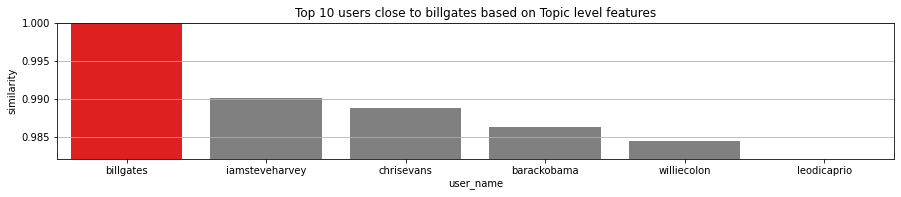

In [475]:
# Visualizing the Top recommanded user based upon the topic level feature matrix
mean = similar_user_II["similarity"].mean()
std = similar_user_II["similarity"].std()
plt.figure(figsize=(15,2.5))
clrs = ['grey' if (x != user_name) else 'red' for x in similar_user_II["user_name"] ]
sns.barplot(similar_user_II["user_name"],similar_user_II["similarity"],palette=clrs)
plt.ylim(mean-std,1)
plt.grid(axis='y')
plt.title(f"Top 10 users close to {user_name} based on Topic level features")
plt.show()

In [476]:
# Analyse the user with all the topic level features
names =similar_user_II["user_name"].to_list()
names.append(user_name)
similar_user_df = df_level_2[df_level_2["user_name"].isin(names)]
similar_user_df["similarities_score"]=similar_user_II.loc[:,"similarity"].copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


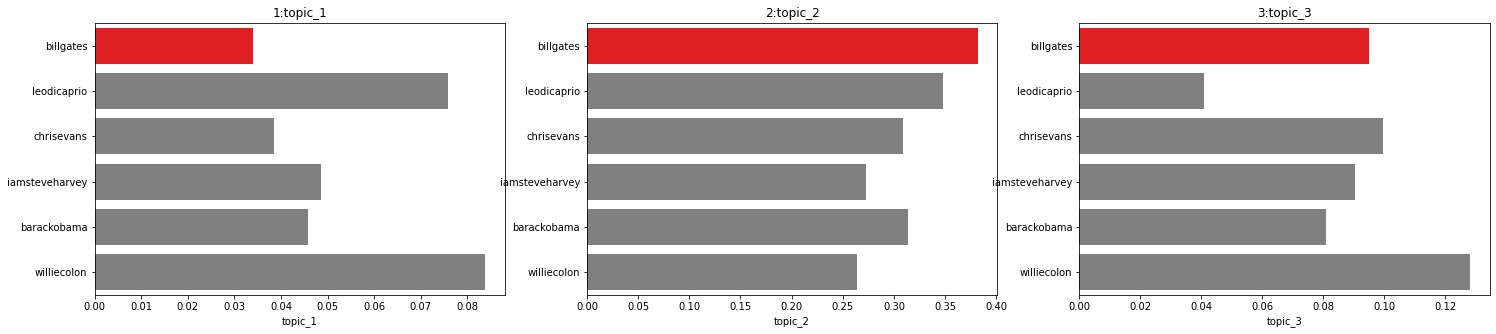

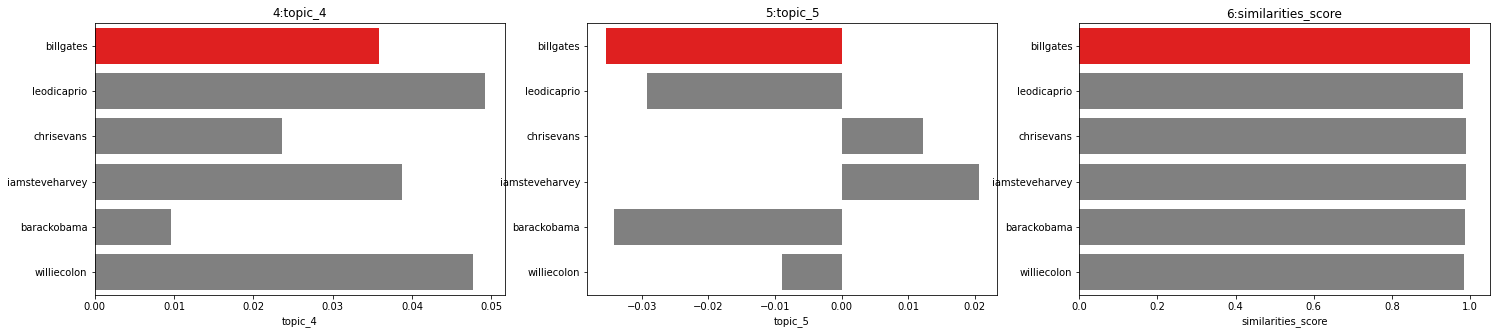

In [477]:
# Visualisation of all the topic level feature of recommanded user with repsect to the main user 
for index in range(1,6,3):
  plt.figure(figsize=(25,5))
  feature_name = similar_user_df.columns[index]
  plt.subplot(1,3,1)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  plt.ylabel("")
  plt.title(f"{index}:{feature_name}")

  feature_name = similar_user_df.columns[index+1]
  plt.subplot(1,3,2)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  plt.ylabel("")
  plt.title(f"{index+1}:{feature_name}")

  feature_name = similar_user_df.columns[index+2]
  plt.subplot(1,3,3)
  clrs = ['grey' if (x !=user_name) else 'red' for x in similar_user_df["user_name"] ]
  sns.barplot(data =similar_user_df, y= "user_name",x=feature_name,palette=clrs)
  plt.ylabel("")
  
  plt.title(f"{index+2}:{feature_name}")

  plt.show()

While exploring the results of the recommended system model, it can be concluded that the proximity of users based on topic level features are asymmetric. 

###### **Evaluating the Topic level recommander Sytem Model**

In [478]:
# Reducing the dimension of the Topic_level_feature matrix
df_level_2_pca = df_level_2.copy()
df_level_2_pca.drop(["user_name"],axis=1,inplace=True)
df_level_2_pca.head(10)


,topic_1,topic_2,topic_3,topic_4,topic_5
0,-0.291492,-0.092447,-0.125933,0.093437,-0.161381
1,-0.033165,0.043515,0.136132,0.005216,-0.103421
2,0.113673,0.049506,0.016216,0.122499,-0.010074
3,-0.007345,0.150776,0.195376,-0.044401,-0.082137
4,0.023662,0.148851,0.095937,0.000779,-0.011743
5,0.050988,0.073890,0.130396,-0.040259,-0.037007
6,0.035307,0.126476,0.117931,0.126245,0.122835
7,0.480425,0.053029,0.070250,0.105071,0.127137
8,0.073243,0.007698,0.020912,-0.010337,0.025852
9,0.056310,0.058851,0.005209,0.363588,0.010381


In [479]:
# reducing the dimensions of the features
pca_topic = PCA(n_components=2).fit_transform(df_level_2_pca)
topic_level_pca = pd.DataFrame(pca_topic)
topic_level_pca.columns =["pc_1","pc_2"]
topic_level_pca.index =df_level_2["user_name"]
topic_level_pca.head()

,pc_1,pc_2
user_name,,
pretagil,-0.230493,0.379352
mirzasania,-0.204476,0.061626
parishilton,0.014020,0.078231
piersmorgan,-0.244739,-0.012387
timtebow,-0.135509,0.040952


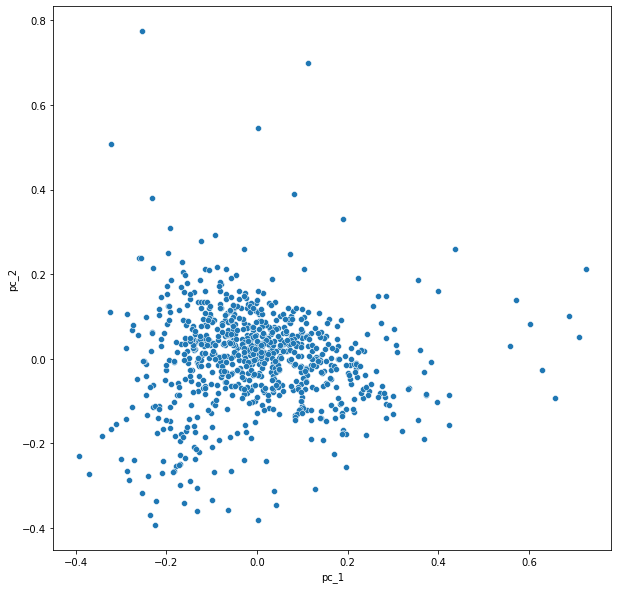

In [480]:
# Visualizing the distribution of the Top level feature in lower dimensions
plt.figure(figsize=(10,10))
sns.scatterplot(data =topic_level_pca, x ="pc_1", y ="pc_2")
plt.show()

The above scatter plot indicates that the top level feature is  also not distributed in a weirdly shaped, such as our concentric circles,therefore K-mean clustering algorithim is considered for clustering  

In [481]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_topic = ss.fit_transform(df_level_2_pca)

In [482]:
# Look over a range of K values
k_range = np.arange(2,20)

# Instantiate an empty list of inertias
inertia_list = []
silhouette_scores=[]

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit and predict
    k_means_model.fit(X_topic)
    cluster_labels = k_means_model.predict(X_topic)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)

    
    # Get silhouette_scores and add to list 
    silhouette_scores.append(silhouette_score(X_topic, cluster_labels))
    

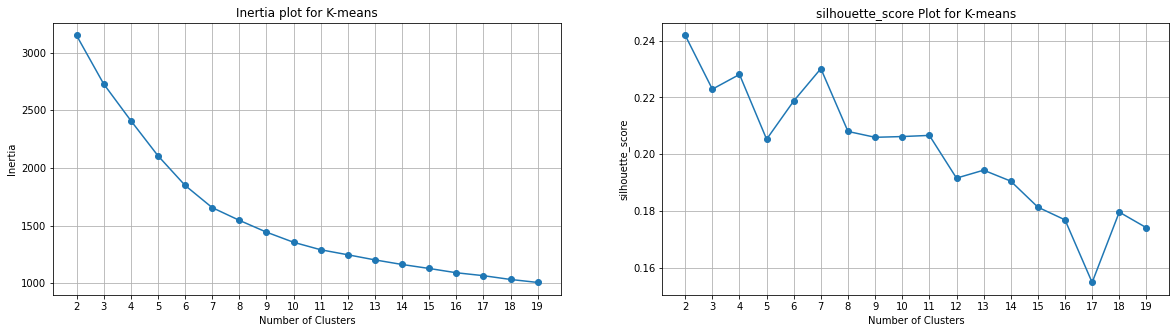

In [483]:
plt.figure(figsize=(20,5))

# Visualize the Interia of the model
plt.subplot(1,2,1)
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia plot for K-means')
plt.xticks(k_range)
plt.grid()


# Visualize the silhouette_score of the model
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette_score Plot for K-means')
plt.grid()
plt.xticks(k_range)

plt.show();

Though it is not clear from the inertia score, but with respect to the silhouette score it is clear that the nine clusters optimize both the inertia and the silhouette score for the mode.Therefore the dataset was grouped into 9 clusters and the proximity of the recommander system results are checked with respect to the cluster they belongs.

In [484]:
# Optimal K mean model 
kmeans_model = KMeans(n_clusters = k_range[np.argmax(silhouette_scores)]).fit(X_topic)
k_means_labels_topic = kmeans_model.predict(X_topic)

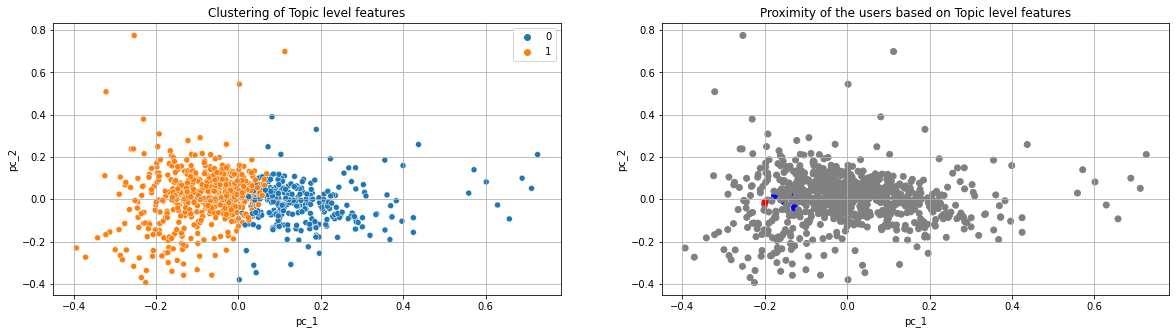

In [485]:
# Ploting the topic level feature in lower dimension with respect to its cluster.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data =topic_level_pca, x ="pc_1", y ="pc_2",hue =k_means_labels_topic)
plt.grid()
plt.title("Clustering of Topic level features")

# ploting the results of the recommander system over the clusters
feature_name = similar_user_df.columns[index]
clrs=[]
for name  in topic_level_pca.index:
  if name in similar_user_df["user_name"].values and name != user_name:
    clrs.append("blue")
  elif name in similar_user_df["user_name"].values and name == user_name:
    clrs.append("red")
  else:
    clrs.append("grey")

plt.subplot(1,2,2)
plt.scatter(data =topic_level_pca, x ="pc_1", y ="pc_2",c=clrs)
plt.grid()
plt.title("Proximity of the users based on Topic level features")
plt.xlabel("pc_1")
plt.ylabel("pc_2")
plt.show()

Comparing the above two scatter plots ,it is clear that the recommender system model for the topic level feature respects the clustering algorithm.i.e it model recommends the users from the same cluster.


##### **Recommender System - Text Level Feature Matrix**

In [486]:

# Droping the user_name column from the Text level Matrix
level_matrix_3 = df_level_3.drop("user_name",axis=1)

# Scaling the training data
scaler = StandardScaler()
scaled_level_matrix_3 = scaler.fit_transform(level_matrix_3)

# Creating the Similarity matrix with for the text level features
similarities_level_III = cosine_similarity(scaled_level_matrix_3, dense_output=False)
similarities_level_III.shape

(611, 611)

In [487]:

# Test the recommender for text level features
similar_user_III = content_recommender(user_name, df_level_3, similarities_level_III)

# Adding the result for text level features
recommandation_result_df["text_level_features"] = similar_user_III["user_name"].values

similar_user_III.head()

,user_name,similarity
90,billgates,1.000000
150,richardbranson,0.022402
122,mcuban,0.020317
180,leodicaprio,0.019573
77,mariashriver,0.018302


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


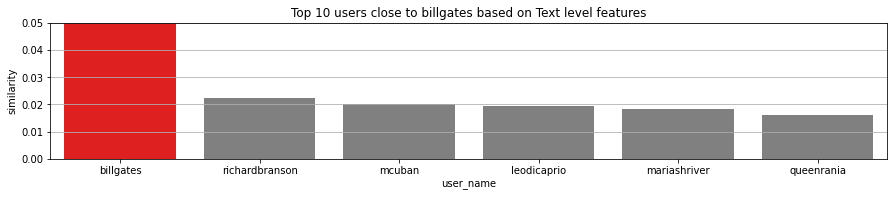

In [488]:
plt.figure(figsize=(15,2.5))
clrs = ['grey' if (x != user_name) else 'red' for x in similar_user_III["user_name"] ]
sns.barplot(similar_user_III["user_name"],similar_user_III["similarity"],palette=clrs)
plt.title(f"Top 10 users close to {user_name} based on Text level features")
plt.ylim(0,0.05)
plt.grid(axis='y')
plt.show()

From the results of the text level feature matrix model, it is observed that the strength of users proximity is not as strong as the  results of other two model top level or topic level , however there is a siginificant consistance within the range of 0.05 - 0.15 

###### **Evaluating the Text level recommander Sytem Model**

In [489]:
# Reducing the dimension of the Topic_level_feature matrix
df_level_3_pca = df_level_3.copy()
df_level_3_pca.drop(["user_name"],axis=1,inplace=True)


In [490]:
# reducing the dimensions of the features
pca_text = PCA(n_components=2).fit_transform(df_level_3_pca)
text_level_pca = pd.DataFrame(pca_text)
text_level_pca.columns =["pc_1","pc_2"]
text_level_pca.index =df_level_3["user_name"]
text_level_pca.head()

,pc_1,pc_2
user_name,,
pretagil,9.071777,2.309976
mirzasania,-3.364672,2.132832
parishilton,-4.811856,0.712405
piersmorgan,-3.817632,3.358339
timtebow,-4.898837,2.448393


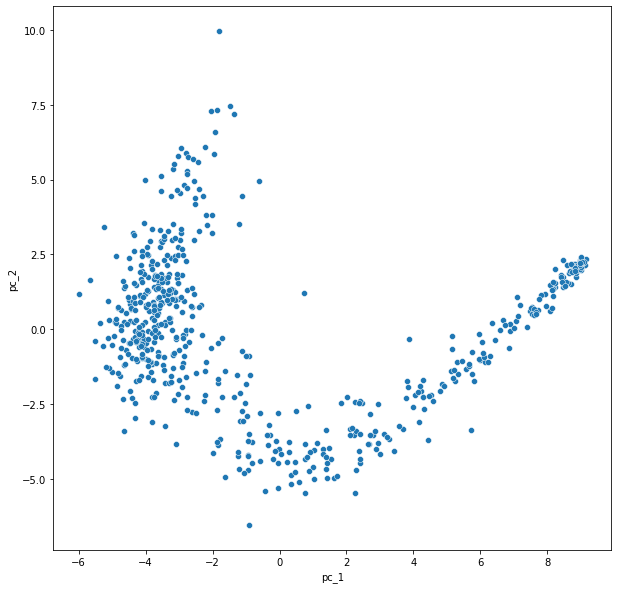

In [491]:
# Visualizing the distribution of the Top level feature in lower dimensions
plt.figure(figsize=(10,10))
sns.scatterplot(data =text_level_pca, x ="pc_1", y ="pc_2")
plt.show()

The above scatter plot indicates that the text level feature is distributed in a weirdly shaped, such as our concentric circles,therefore DBSCAN clustering algorithim is considered for clustering  

In [492]:
# Exploring the optinal value of eps
silhouette_scores = []
min_sample_no=[]
n_clusters = []
eps_score=[]
eps = np.arange(0.25,6.0,.25)
min_samples=np.arange(5,20,5)

# Iterate over eps
for e in eps:
  for s in min_samples:
      # Instantiate
      dbscan_model = DBSCAN(eps=e, min_samples=s)

      # Fit
      cluster_labels = dbscan_model.fit_predict(text_level_pca)
      
      # Find non-noise points
      non_noise = cluster_labels[cluster_labels != -1]
      
      # Get silhouette score and number of clusters
      n_cluster = len(np.unique(non_noise))
      
      if n_cluster > 1:
          silhouette = silhouette_score(text_level_pca, cluster_labels)
      else:
          silhouette = np.NaN
      
      # Append to list
      eps_score.append(e)
      min_sample_no.append(s)
      n_clusters.append(n_cluster)
      silhouette_scores.append(silhouette)

In [493]:
# Put in a dataframe
dbscan_clusters =pd.DataFrame({'eps':eps_score, 'min_sample':min_sample_no,'n_clusters':n_clusters, 'silhouette':silhouette_scores})

# Exploring the Maximum value of silhouette to identify the eps  and min_sample value
dbscan_optimal = dbscan_clusters[dbscan_clusters["silhouette"]==dbscan_clusters["silhouette"].max()]
dbscan_optimal

,eps,min_sample,n_clusters,silhouette
8,0.75,15,6,0.420084


Based on the above table , the optimal value for eps is 5.75 and min_smaple is 15 for the Dbscan clustering model.

In [494]:
# Optimal dbscan mean model 
dbscan_model = DBSCAN(eps=dbscan_optimal["eps"].values, min_samples=dbscan_optimal["min_sample"].values)
dbscan_labels_text = dbscan_model.fit_predict(text_level_pca)

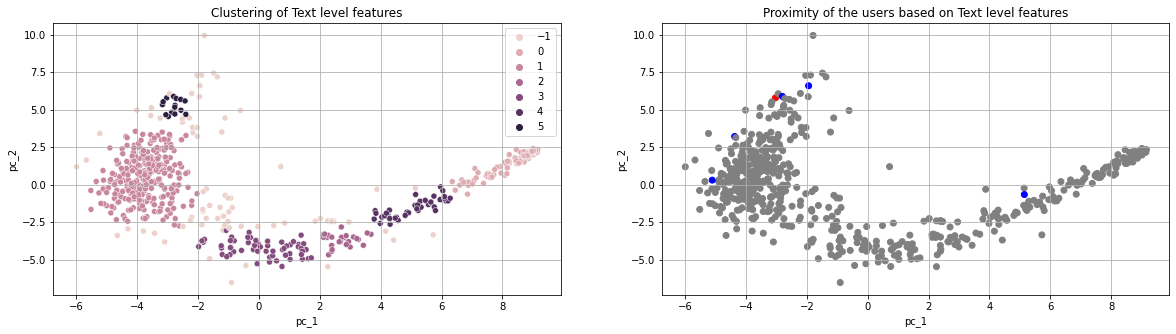

In [495]:
# Ploting the topic level feature in lower dimension with respect to its cluster.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data =text_level_pca, x ="pc_1", y ="pc_2",hue =dbscan_labels_text)
plt.grid()
plt.title("Clustering of Text level features")

# ploting the results of the recommander system over the clusters
feature_name = similar_user_df.columns[index]
clrs=[]
for name  in text_level_pca.index:
  if name in similar_user_df["user_name"].values and name != user_name:
    clrs.append("blue")
  elif name in similar_user_df["user_name"].values and name == user_name:
    clrs.append("red")
  else:
    clrs.append("grey")

plt.subplot(1,2,2)
plt.scatter(data =text_level_pca, x ="pc_1", y ="pc_2",c=clrs)
plt.grid()
plt.title("Proximity of the users based on Text level features")
plt.xlabel("pc_1")
plt.ylabel("pc_2")
plt.show()

Comparing the above two scatter plots ,it is clear that the recommender system model for the text level feature respects the clustering algorithm.i.e it model recommends the majority of the users from the same cluster or from the noise area.


###**Combined Result of the All the three models**

In [496]:
# comparing the results of all the three models
recommandation_result_df.head()

,top_level_features,topic_level_features,text_level_features
0,billgates,billgates,billgates
1,johncena,iamsteveharvey,richardbranson
2,wyclef,chrisevans,mcuban
3,schwarzenegger,barackobama,leodicaprio
4,mcilroyrory,williecolon,mariashriver


###**Network Analysis**

In [497]:
import networkx as nx
from matplotlib.pyplot import figure
import networkx as nx             
import nxviz as nv               
from nxviz import annotate         


In [498]:
# fuction to evaluate the graphy network for the results of its own as well as other two models
def network_analysis(df,simialrity_matrix,recommandation_result_combined,model_name):
  # creating the dataframe based on the simialrity matrix for text level model
  network_level = pd.DataFrame(simialrity_matrix)
  network_level.index=df.user_name
  network_level[network_level <0]=0
  network_level.head()

  # Reseting the column name 
  network_level.columns = network_level.index.to_list()
  network_level.index.names=["source"]

  # Stacking the data frame to create source , target and weight for the network
  network_df= pd.DataFrame(network_level.stack())
  network_df=network_df.reset_index(level=0).reset_index(level=0)
  network_df.columns=["Target","Source","Weight"]

  # droping the rows where the source and target are same 
  network_df= network_df.query("Source != Target")

  # droping the rows where the weight is below zero
  network_df = network_df[network_df["Weight"]!=0] 
  figure(figsize=(20,10))
  results=[]
  for index,col in enumerate(recommandation_result_combined.columns):
    # Creating the network grophy based in the result of the recommender sytem model
    results = results+list(recommandation_result_combined[col].values)
  results= list(set(results))
  network_df_selected = network_df[(network_df['Target'].isin(results))&(network_df['Source'].isin(results))]

  G = nx.Graph()
  G = nx.from_pandas_edgelist(network_df_selected,"Source","Target",["Weight"])

  nx.draw_shell(G,with_labels=True)
  plt.title(f"Network Model:{model_name}",fontsize=16)
  plt.show()


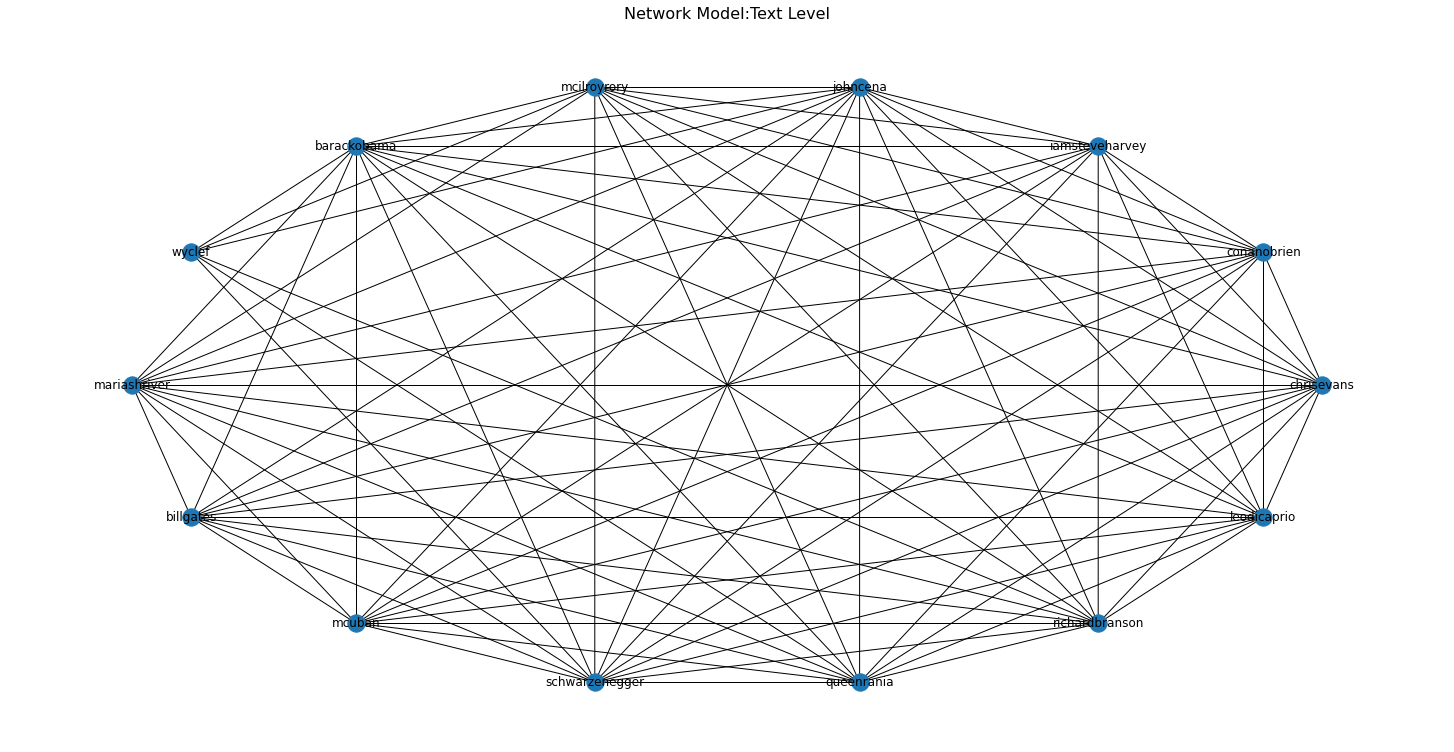

In [499]:
# Plotting the netwrok model for Text level model and comparing the result with other two model
network_analysis(df_level_3,similarities_level_III,recommandation_result_df,"Text Level")

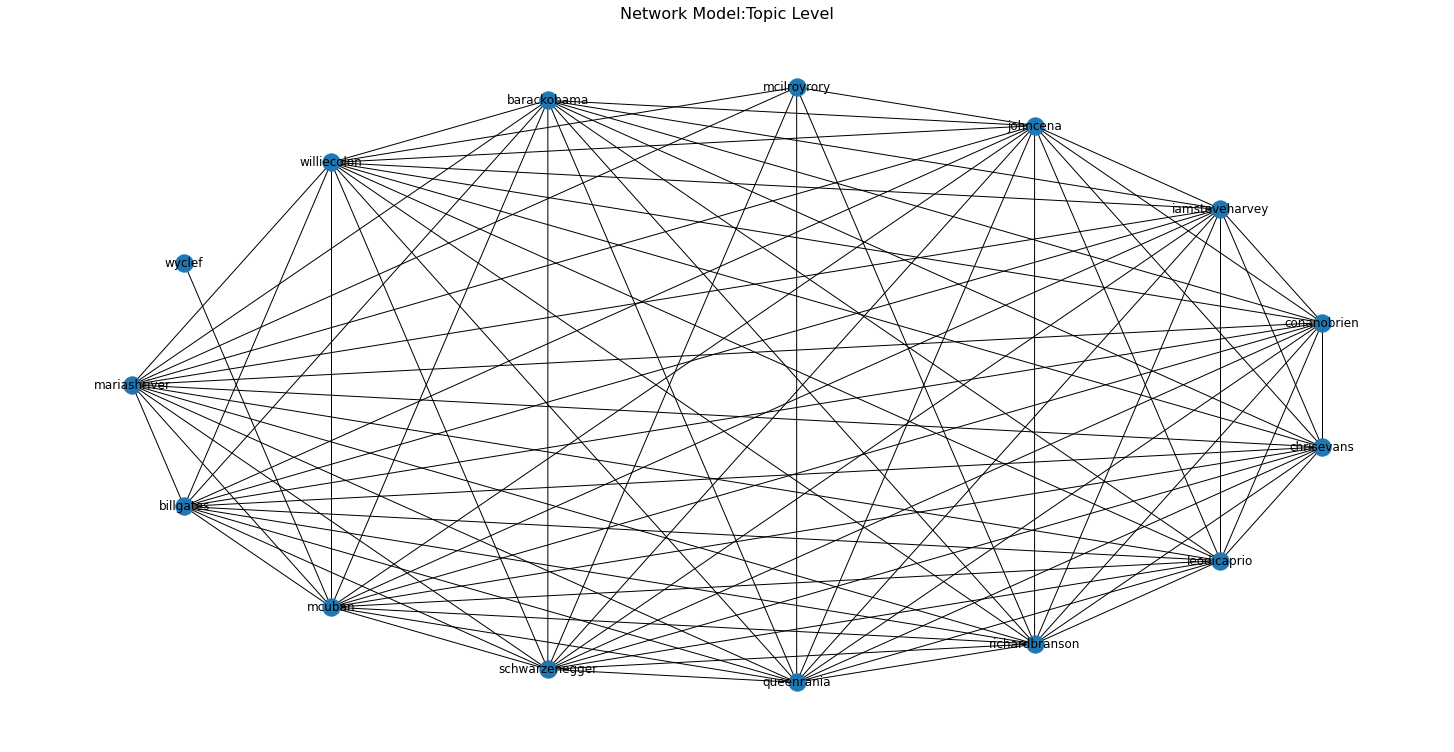

In [500]:
# Plotting the netwrok model for Topic level model and comparing the result with other two model
network_analysis(df_level_2,similarities_level_II,recommandation_result_df,"Topic Level")

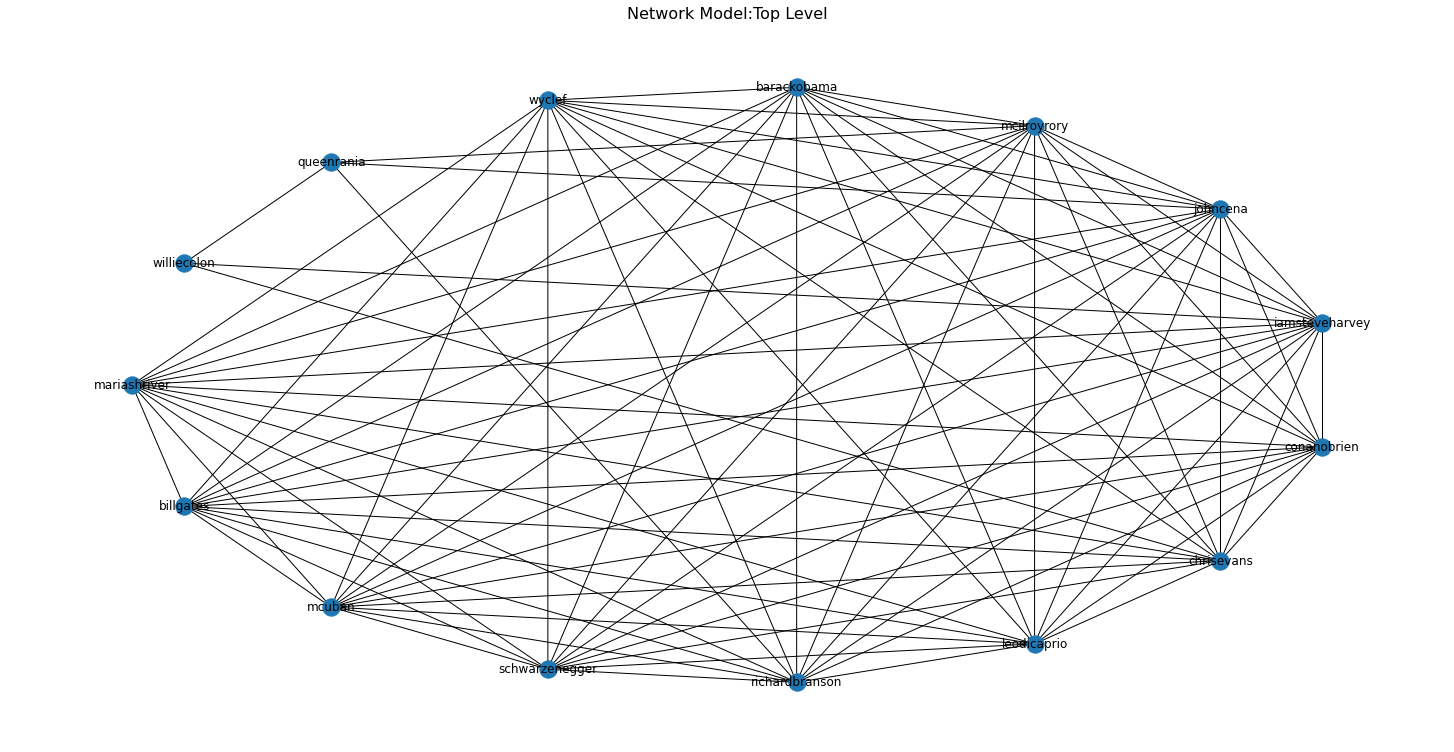

In [501]:
# Plotting the netwrok model for Top level model and comparing the result with other two model
network_analysis(df_level_1,similarities_level_I,recommandation_result_df,"Top Level")

#### **Conclusion**
Based on the above three sets of network model,it is now clear that all the three model results has a strong sense of commnalities. Therefore it can now be conclused that the model are capable enough to capture the closet possible people based on the user texting behaviour.